In [1]:
%%javascript

window.load_remote_theme = false
var theme_url = "https://drostehk.github.io/ipynb-theme/";
var asset_url = 'https://raw.githubusercontent.com/tijptjik/DS_assets/master/';

window.load_local_theme = function(){
    var hostname = document.location.hostname
    return ((hostname == "localhost" || hostname == '127.0.0.1') && !load_remote_theme)
}

var url = load_local_theme() ? document.location.origin + "/files/theme/custom.js" : theme_url + 'custom.js'

$.getScript(url)

<IPython.core.display.Javascript object>

Include:
* [Finding cheaters using multiple-choice comparisons
](http://jd-mathbio.blogspot.ca/2015/02/finding-cheaters-using-multiple-choice.html?utm_source=marketo&utm_medium=email&utm_campaign=DA-NL-202&mkt_tok=3RkMMJWWfF9wsRokvq3MZKXonjHpfsX%2B7%2BooW6Gg38431UFwdcjKPmjr1YEETcB0aPyQAgobGp5I5FEOS7PYS6V6t6EOUg%3D%3D)

# Exploratory Data Analysis

> Doing statistics is like doing crosswords except that one cannot know for sure whether one has found the solution.

<footer>~  John W. Tukey</footer>

![break](assets/agenda.png)

### Agenda

* Deal with Missing Data
* Explore Data by Visualisations

### Labs

![break](assets/theory.png)

## The Goals of Exploratory Data Analysis

1. Summarize the main characteristics of datasets with Summary Statistics (Initial Data Analysis)
1. Visually inspect the structure and nature of the data
1. Find what the data can tell us beyond the formal modeling or hypothesis testing task.

### Let the visuals speak to you

Always explore your data visually. Whatever specific hypothesis you have when you go out to collect data is likely to be worse than any of the hypotheses you’ll form after looking at just a few simple visualizations of that data.

#### Install a the `ggplot` visualition library

In [2]:
!pip install ggplot

#### Load `ggplot` and plot graphs inline

In [2]:
from ggplot import *
import pandas as pd

%matplotlib inline

### How are zipcodes distributed in the US?

In [5]:
zipcodes = pd.read_csv("../data/zipcodes.csv")
zipcodes

,zip,type,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,latitude,longitude,world_region,country,decommissioned,estimated_population,notes
0,544,UNIQUE,Holtsville,NaN,Irs Service Center,NY,Suffolk County,America/New_York,631,40.81,-73.04,NaN,US,0,0,NaN
1,601,STANDARD,Adjuntas,NaN,"Colinas Del Gigante, Jard De Adjuntas, Urb San...",PR,Adjuntas,America/Puerto_Rico,787939,18.16,-66.72,NaN,US,0,0,NaN
2,602,STANDARD,Aguada,NaN,"Alts De Aguada, Bo Guaniquilla, Comunidad Las ...",PR,NaN,NaN,787,18.38,-67.18,NaN,US,0,0,NaN
3,603,STANDARD,Aguadilla,Ramey,"Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceiba...",PR,Aguadilla,America/Puerto_Rico,787,18.43,-67.15,NaN,US,0,0,NaN
4,604,PO BOX,Aguadilla,Ramey,NaN,PR,NaN,NaN,NaN,18.43,-67.15,NaN,US,0,0,NaN
5,605,PO BOX,Aguadilla,NaN,NaN,PR,NaN,NaN,NaN,18.43,-67.15,NaN,US,0,0,NaN
6,606,STANDARD,Maricao,NaN,Urb San Juan Bautista,PR,Maricao,America/Puerto_Rico,787939,18.18,-66.98,NaN,US,0,0,NaN
7,610,STANDARD,Anasco,NaN,"Brisas De Anasco, Est De Valle Verde, Jard De ...",PR,NaN,NaN,787,18.28,-67.14,NaN,US,0,0,NaN
8,611,PO BOX,Angeles,NaN,NaN,PR,NaN,NaN,NaN,18.28,-66.79,NaN,US,0,0,"no NWS data,"
9,612,STANDARD,Arecibo,NaN,"Alt De Juncos, Alt De San Felipe, Bda Duhamel,...",PR,Arecibo,America/Puerto_Rico,787,18.45,-66.73,NaN,US,0,0,NaN


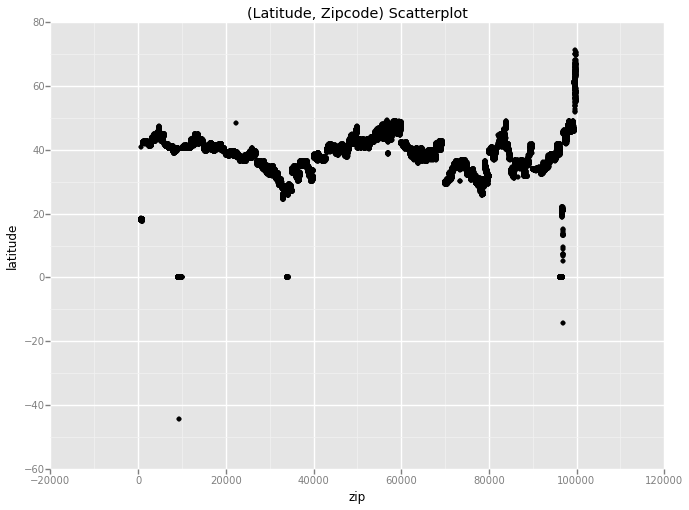

<ggplot: (8766814702053)>

In [6]:
ggplot(zipcodes, aes(x = 'zip', y = 'latitude')) + \
    geom_point() + \
    ggtitle("(Latitude, Zipcode) Scatterplot")

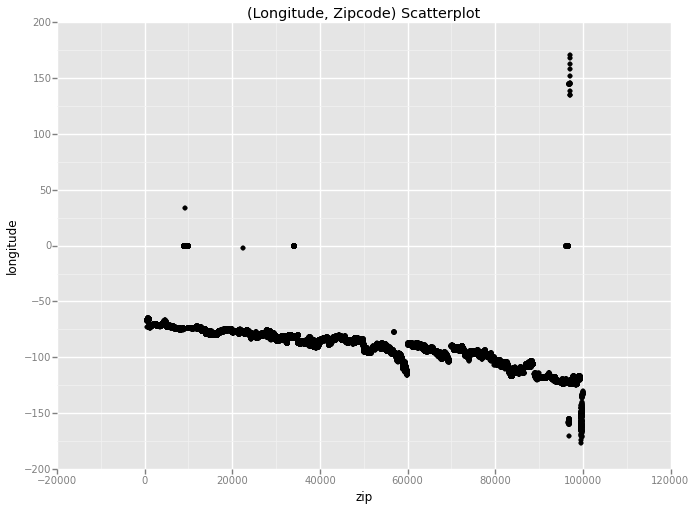

<ggplot: (8742694239445)>

In [239]:
ggplot(zipcodes, aes(x = 'zip', y = 'longitude')) + \
    geom_point() + \
    ggtitle("(Longitude, Zipcode) Scatterplot")

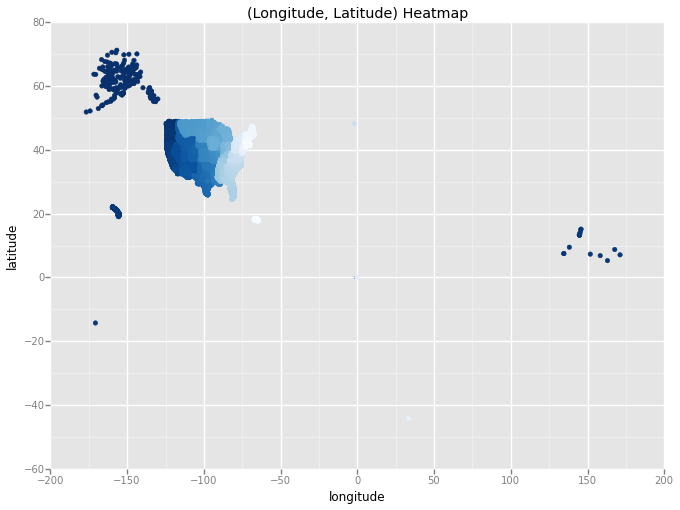

<ggplot: (8742694927929)>

In [240]:
ggplot(zipcodes, aes(x = 'longitude', y = 'latitude', color = 'zip')) + \
    geom_point() + \
    ggtitle("(Longitude, Latitude) Heatmap")

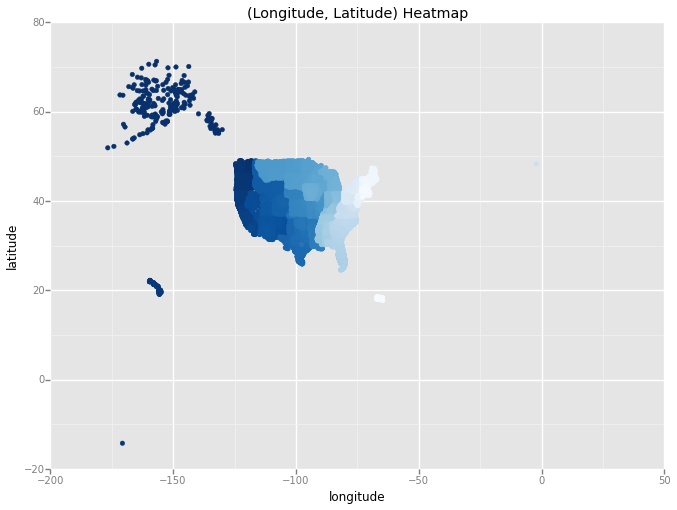

<ggplot: (8742694664441)>

In [241]:
ggplot(zipcodes[zipcodes['longitude'] < 0], aes(x = 'longitude', y = 'latitude', color = 'zip')) + \
    geom_point() + \
    ggtitle("(Longitude, Latitude) Heatmap")

### Objectives

* **Quality of measurements**
* **Quality of data**
* **Initial transformations**
* **Univariate statistics** (single variable)
* **Bivariate associations** (correlations)
* **Multivarite patterns** (analysis)

### Missing Data

In this section, we will discuss missing (also referred to as **NA**) values in pandas.

#### When / why does data become missing?

Some might quibble over our usage of missing. By “missing” we simply mean null or “not present for whatever reason”. Many data sets simply arrive with missing data, either because it exists and was not collected or it never existed. For example, in a collection of financial time series, some of the time series might start on different dates. Thus, values prior to the start date would generally be marked as missing.

As data comes in many shapes and forms, pandas aims to be flexible with regard to handling missing data. While `NaN` is the default missing value marker for reasons of computational speed and convenience, we need to be able to easily detect this value with data of different types: floating point, integer, boolean, and general object. In many cases, however, the Python `None` will arise and we wish to also consider that “missing” or “null”.

* NaN and None (in object arrays) are considered missing by the isnull and notnull functions. inf and -inf are no longer considered missing by default.
* To make detecting missing values easier (and across different array dtypes), pandas provides the `isnull()` and `notnull()` functions, which are also methods on `Series` objects:

In [3]:
rows

[0, 1, 5, 6, 8, 7]

In [44]:
import pandas as pd
import numpy as np
from random import sample

data = range(10)

rows = sample(data, 6)

df = pd.DataFrame(data, columns=['data'])

df['fulldata'] = data

df.data.ix[rows[:3]] = None
df.data.ix[rows[3:]] = np.nan

In [45]:
rows

[5, 8, 2, 1, 6, 3]

In [8]:
df

,data,fulldata
0,0,0
1,1,1
2,NaN,2
3,None,3
4,None,4
5,5,5
6,6,6
7,None,7
8,NaN,8
9,NaN,9


In [10]:
pd.isnull(df.data)
# same as
df.data.isnull()

0    False
1    False
2     True
3     True
4     True
5    False
6    False
7     True
8     True
9     True
Name: data, dtype: bool

In [11]:
pd.notnull(df.data)
# same as
df.data.notnull()

0     True
1     True
2    False
3    False
4    False
5     True
6     True
7    False
8    False
9    False
Name: data, dtype: bool

#### Calculations with missing data

The descriptive statistics and computational methods in pandas are all written to account for missing data

* When summing data, `NA` (missing) values will be treated as zero
* If the data are all `NA`, the result will be `NA`
* Methods like `cumsum` and `cumprod` ignore `NA` values, but preserve them in the resulting arrays

In [277]:
df

,data,fulldata
0,0,0
1,NaN,1
2,2,2
3,None,3
4,4,4
5,None,5
6,NaN,6
7,NaN,7
8,8,8
9,None,9


In [278]:
df['data'].sum()

14

In [279]:
df.mean(1)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: float64

In [280]:
df.cumsum()

,data,fulldata
0,0,0
1,NaN,1
2,2,3
3,NaN,6
4,6,10
5,NaN,15
6,NaN,21
7,NaN,28
8,14,36
9,NaN,45


### Cleaning / filling missing data

pandas objects are equipped with various data manipulation methods for dealing with missing data

#### Filling missing values: `fillna()`

The `fillna` function can “fill in” NA values with non-null data in a couple of ways, which we illustrate:

##### Replace NA with a scalar value

In [281]:
df

,data,fulldata
0,0,0
1,NaN,1
2,2,2
3,None,3
4,4,4
5,None,5
6,NaN,6
7,NaN,7
8,8,8
9,None,9


In [12]:
df.fillna(0)

,data,fulldata
0,0,0
1,1,1
2,0,2
3,0,3
4,0,4
5,5,5
6,6,6
7,0,7
8,0,8
9,0,9


In [13]:
df['data'].fillna('missing')

0          0
1          1
2    missing
3    missing
4    missing
5          5
6          6
7    missing
8    missing
9    missing
Name: data, dtype: object

#### Fill gaps forward or backward

We can propagate non-null values forward or backward:

In [14]:
df.fillna(method='pad')

,data,fulldata
0,0,0
1,1,1
2,1,2
3,1,3
4,1,4
5,5,5
6,6,6
7,6,7
8,6,8
9,6,9


#### Limit the amount of filling

If we only want consecutive gaps filled up to a certain number of data points, we can use the limit keyword:

In [285]:
df.fillna(method='pad', limit=1)

,data,fulldata
0,0,0
1,0,1
2,2,2
3,2,3
4,4,4
5,4,5
6,NaN,6
7,NaN,7
8,8,8
9,8,9


These are the available filling methods:

| Method | Action |
|--------|--------|
| pad / ffill	Fill | values forward |
| bfill / backfill | Fill values backward |

With time series data, using pad/ffill is extremely common so that the “last known value” is available at every time point.

The ffill() function is equivalent to fillna(method='ffill') and bfill() is equivalent to fillna(method='bfill')

You can also fillna using a `dict` or `Series` that is alignable. The labels of the `dict` or `index` of the `Series` must match the columns of the frame you wish to fill. The use case of this is to fill a DataFrame with the mean of that column.

In [286]:
df.fillna(df.mean())

,data,fulldata
0,0.0,0
1,3.5,1
2,2.0,2
3,3.5,3
4,4.0,4
5,3.5,5
6,3.5,6
7,3.5,7
8,8.0,8
9,3.5,9


### Dropping axis labels with missing data: dropna

You may wish to simply exclude labels from a data set which refer to missing data. To do this, use the dropna method:

In [287]:
df

,data,fulldata
0,0,0
1,NaN,1
2,2,2
3,None,3
4,4,4
5,None,5
6,NaN,6
7,NaN,7
8,8,8
9,None,9


In [15]:
df.dropna()

,data,fulldata
0,0,0
1,1,1
5,5,5
6,6,6


In [16]:
df.dropna(axis=1)

,fulldata
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


For a full overview of the API, see the [documentation](http://pandas.pydata.org/pandas-docs/dev/api.html#api-dataframe-missing)

### Interpolation

Both Series and Dataframe objects have an interpolate method that, by default, performs linear interpolation at missing datapoints.

This is where datatypes become important again. Notice the `dtype` of the 'data' column.

In [290]:
df.data

0       0
1     NaN
2       2
3    None
4       4
5    None
6     NaN
7     NaN
8       8
9    None
Name: data, dtype: object

First we need to get rid of the 'None' values, as this makes it into the loosest 'object' datatype. Using NaN we can use the float dataetime..

In [17]:
df.isnull()

,data,fulldata
0,False,False
1,False,False
2,True,False
3,True,False
4,True,False
5,False,False
6,False,False
7,True,False
8,True,False
9,True,False


In [291]:
df[df.isnull()] = np.nan
df

,data,fulldata
0,0,0
1,NaN,1
2,2,2
3,NaN,3
4,4,4
5,NaN,5
6,NaN,6
7,NaN,7
8,8,8
9,NaN,9


use `astype` to coerce a column into a specific datatype.

In [27]:
df.data.astype('float')

0     0
1     1
2   NaN
3   NaN
4   NaN
5     5
6     6
7   NaN
8   NaN
9   NaN
Name: data, dtype: float64

In [46]:
df.data = df.data.astype(np.float)

In [47]:
df.data

0     0
1   NaN
2   NaN
3   NaN
4     4
5   NaN
6   NaN
7     7
8   NaN
9     9
Name: data, dtype: float64

In [48]:
df.interpolate()

,data,fulldata
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5
6,6,6
7,7,7
8,8,8
9,9,9


For a floating-point index, use method='values'

In [56]:
dfxx = df.ix[[0,2,5,9]]

In [57]:
dfxx

,data,fulldata
0,0,0
2,NaN,2
5,NaN,5
9,9,9


In [58]:
dfxx.interpolate()

,data,fulldata
0,0,0
2,3,2
5,6,5
9,9,9


In [59]:
dfxx.interpolate(method='values')

,data,fulldata
0,0,0
2,2,2
5,5,5
9,9,9


As a practical review of what's discussed here see this [summary](http://manishamde.github.io/blog/2013/03/07/pandas-and-python-top-10/#missing)

### Tips

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay.

In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law the restaurant offered seating in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

    Source: Bryant, P. G. and Smith, M. A. (1995), Practical Data Analysis:
    Case Studies in Business Statistics, Richard D. Irwin Publishing, Homewood, IL.

**What are the factors that affect tipping behavior?**

#### Load the Dataset

In [62]:
from ggplot import *

tips = pd.read_csv('../data/tips.csv')

#### Inspect the variables

In [318]:
tips.describe()

,obs,totbill,tip,size
count,244.000000,244.000000,244.000000,244.000000
mean,122.500000,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.951100
min,1.000000,3.070000,1.000000,1.000000
25%,61.750000,13.347500,2.000000,2.000000
50%,122.500000,17.795000,2.900000,2.000000
75%,183.250000,24.127500,3.562500,3.000000
max,244.000000,50.810000,10.000000,6.000000


In [316]:
# info() is more informative than 'describe()' as
# it gives you the datatypes length of dataset
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 8 columns):
obs        244 non-null int64
totbill    244 non-null float64
tip        244 non-null float64
sex        244 non-null object
smoker     244 non-null object
day        244 non-null object
time       244 non-null object
size       244 non-null int64
dtypes: float64(2), int64(2), object(4)

In [324]:
# Look at a random sample of the rows
tips.ix[random.sample(tips.index,10)]

,obs,totbill,tip,sex,smoker,day,time,size
115,116,17.31,3.50,F,No,Sun,Night,2
106,107,20.49,4.06,M,Yes,Sat,Night,2
67,68,3.07,1.00,F,Yes,Sat,Night,1
73,74,25.28,5.00,F,Yes,Sat,Night,2
189,190,23.10,4.00,M,Yes,Sun,Night,3
119,120,24.08,2.92,F,No,Thu,Day,4
204,205,20.53,4.00,M,Yes,Thu,Day,4
214,215,28.17,6.50,F,Yes,Sat,Night,3
200,201,18.71,4.00,M,Yes,Thu,Day,3
52,53,34.81,5.20,F,No,Sun,Night,4


In [ ]:
# Inspect head and tail of the dataset

In [325]:
tips.head()

,obs,totbill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,F,No,Sun,Night,2
1,2,10.34,1.66,M,No,Sun,Night,3
2,3,21.01,3.50,M,No,Sun,Night,3
3,4,23.68,3.31,M,No,Sun,Night,2
4,5,24.59,3.61,F,No,Sun,Night,4


In [326]:
tips.tail()

,obs,totbill,tip,sex,smoker,day,time,size
239,240,29.03,5.92,M,No,Sat,Night,3
240,241,27.18,2.00,F,Yes,Sat,Night,2
241,242,22.67,2.00,M,Yes,Sat,Night,2
242,243,17.82,1.75,M,No,Sat,Night,2
243,244,18.78,3.00,F,No,Thu,Night,2


We look first at the variable of greatest interest to the waiter: tip. A common graph for looking at a single variable is the histogram, where data values are binned and the count is represented by a rectangular bar.

### Tip

Start your exploration of a single parameter - usually you'd pick the more important one for your research question.

/home/io/.tools/anaconda/lib/python2.7/site-packages/pandas/util/decorators.py:53: FutureWarning: rows is deprecated, use index instead
  warnings.warn(msg, FutureWarning)


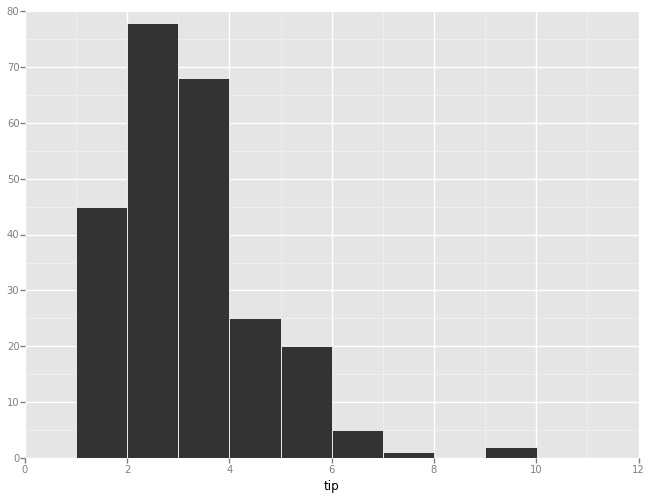

<ggplot: (8742693988549)>

In [328]:
ggplot(tips, aes(x='tip')) + geom_histogram(binwidth=1)

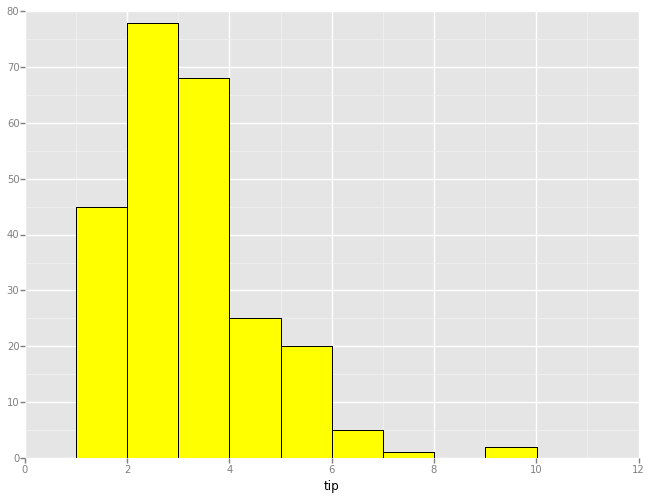

<ggplot: (8742693486149)>

In [329]:
# Draw with black outline, yellow fill
ggplot(tips, aes(x='tip')) + geom_histogram(binwidth=1, colour="black", fill="yellow")

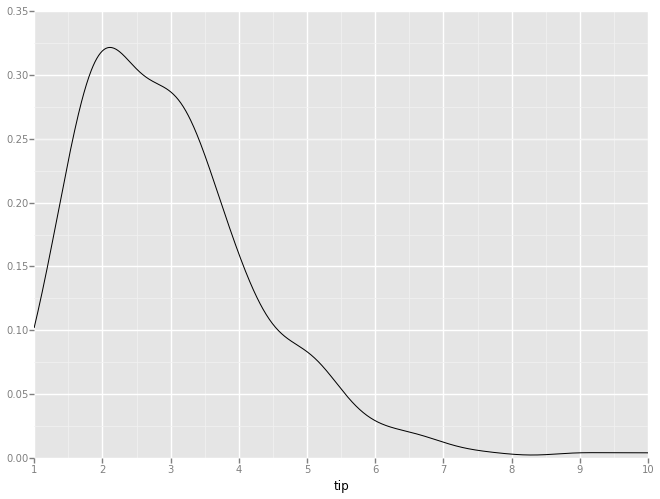

<ggplot: (8742693988397)>

In [332]:
# Density curve
ggplot(tips, aes(x='tip')) + geom_density()

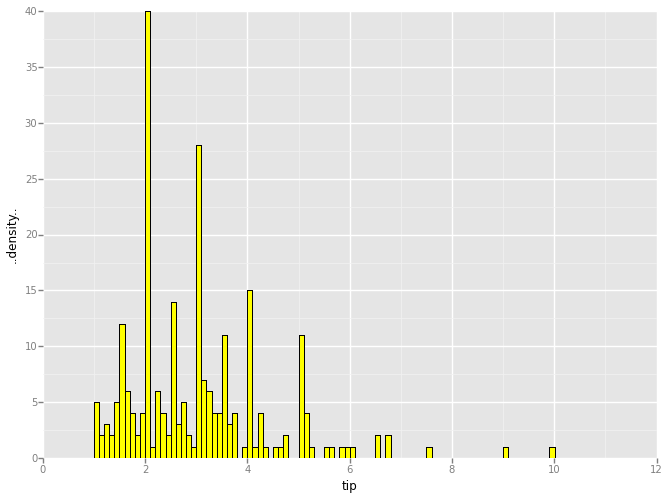

<ggplot: (8743291279289)>

In [66]:
# Histogram overlaid with kernel density curve
ggplot(tips, aes(x='tip')) + \
    geom_histogram(aes(y='..density..'),      # Histogram with density instead of count on y-axis
                   binwidth=0.1,
                   colour="black", fill="yellow")

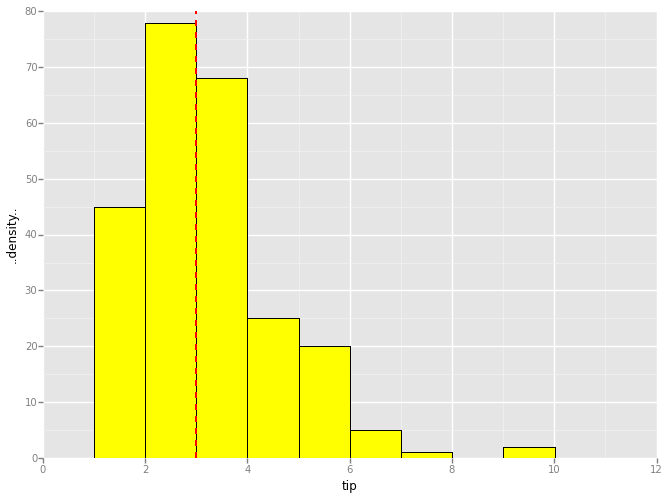

<ggplot: (8742695608549)>

In [347]:
# Add a line for the mean:
avg_tips = np.mean(tips.tip)

ggplot(tips, aes(x='tip')) + \
    geom_histogram(aes(y='..density..'),      # Histogram with density instead of count on y-axis
                   binwidth=1,
                   colour="black",
                   fill="yellow") + \
    geom_vline(aes(xintercept=avg_tips),
               color="red",
               linetype="dashed",
               size=2)

The distribution appears to be unimodal; that is, it has one peak, the bar representing the tips greater than \$1.50 and less than or equal \$2.50. There are
very few tips of \$1.50 or less. The number of larger tips trails off rapidly, which suggests that this is not a very expensive restaurant.

The conclusions drawn from a histogram are often influenced by the choice of bin width, which is a parameter of the _graph_ and not of the _data_.


#### Tip 2
Experiment with different bin-widths for you histograms - at low granulairty, you'll get a better idea of the overall distribution, at higher levels of granulairty you can inspect whether any 'clipping' is occuring. In other words, **a large bin width smooths out the graph and shows rough or global trends, whereas a smaller bin width highlights more local features**.

In [67]:
# Draw with black outline, yellow fill, binwidth at $0.10
p01 = ggplot(tips, aes(x='tip')) + geom_histogram(binwidth=0.1, colour="black", fill="yellow")

# Draw with black outline, yellow fill, binwidth at $0.50
p05 = ggplot(tips, aes(x='tip')) + geom_histogram(binwidth=0.5, colour="black", fill="yellow")

# Draw with black outline, yellow fill, binwidth at $1
p1 = ggplot(tips, aes(x='tip')) + geom_histogram(binwidth=1, colour="black", fill="yellow")

# Draw with black outline, yellow fill, binwidth at $1
p4 = ggplot(tips, aes(x='tip')) + geom_histogram(binwidth=4, colour="black", fill="yellow")

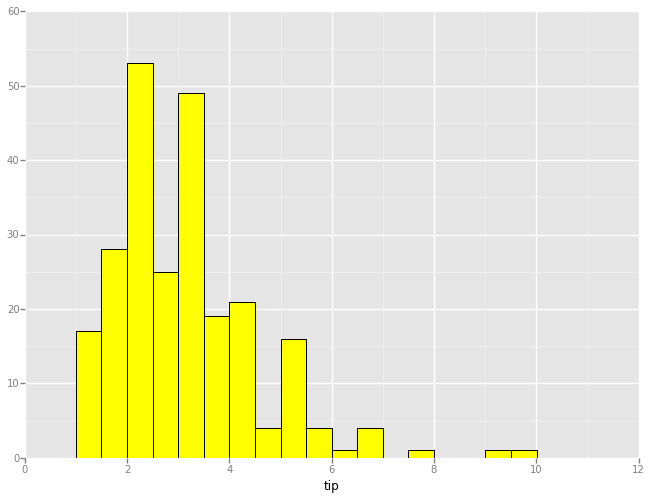

<ggplot: (8742693999573)>

In [353]:
p05

/home/io/.tools/anaconda/lib/python2.7/site-packages/ggplot/geoms/geom_bar.py:47: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  _reset = self.bottom == None or (self.ax != None and self.ax != ax)


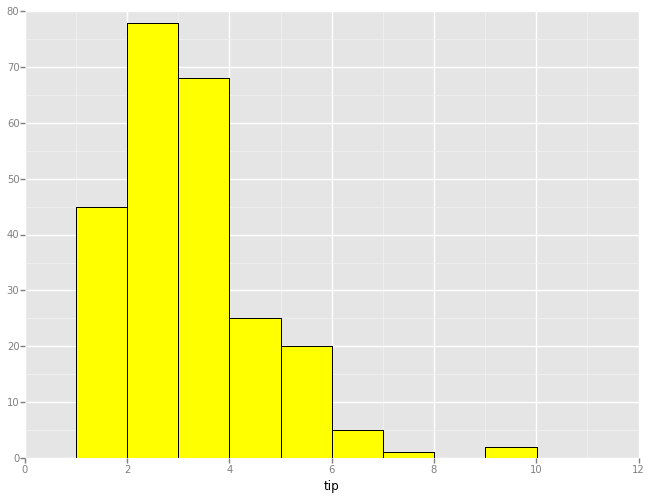

<ggplot: (8742693092505)>

In [354]:
p1

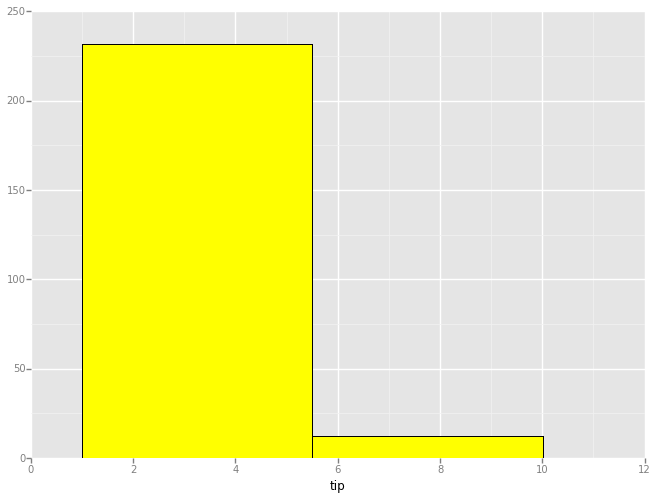

<ggplot: (8743291018329)>

In [68]:
p4

This shows a histogram with a smaller bin width, 10c. At the smaller bin width the shape is multimodal, and it is clear that there are large peaks at the full
dollars and smaller peaks at the half dollar. This shows that the customers tended to round the tip to the nearest fifty cents or dollar.

So far we have not addressed the primary question: What relationships exist between tip and the other variables? Since the tip is usually calculated
based on the bill, it is natural to look first at a graph of tip and bill. A common graph for looking at a pair of continuous variables is the scatterplot.


### Scatterplot

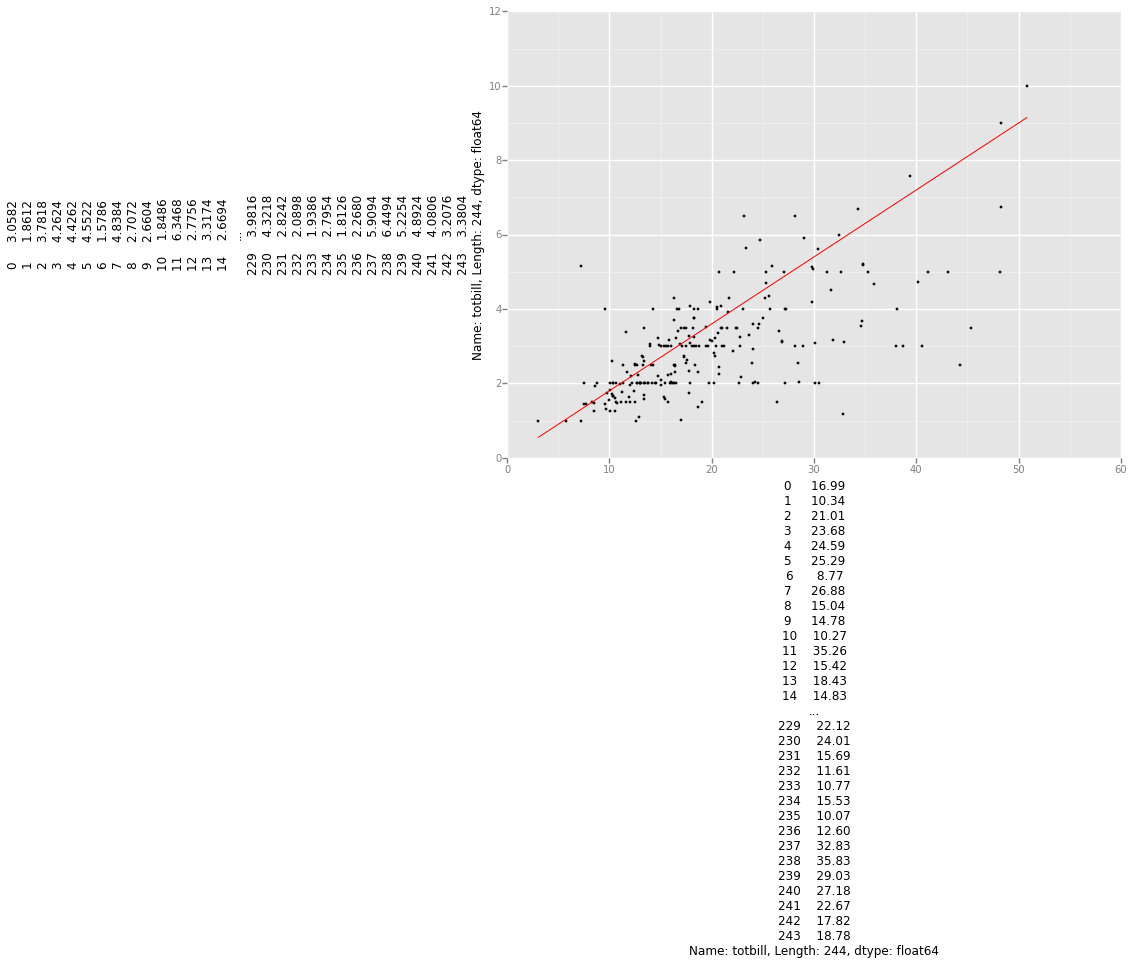

<ggplot: (8742692303929)>

In [404]:
# GET EQUATION AND R-SQUARED AS STRING
# SOURCE: http://goo.gl/K4yh
tb = tips['totbill']
tr = tips['totbill'] * 0.18

ggplot(aes(x = 'totbill', y = 'tip'), data = tips) + \
    geom_line(aes(tb, tr), colour = "red", size = 1,) + \
    geom_point(colour = "black", size = 5)


We see that the variables are highly correlated ($r$ = 0.68), which confirms that tip is calculated from the bill. We have added a line representing a tip rate of 18\%. Disappointingly for the waiter, there are many more points below the line than above it: There are many more “cheap tippers” than generous tippers. There are a couple of notable exceptions, especially one party who gave a \$5.15 tip for a \$7.25 bill, which works out to a tip rate of about 70%.

**Histogram and density plots with multiple groups**

/home/io/.tools/anaconda/lib/python2.7/site-packages/ggplot/geoms/geom_bar.py:47: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  _reset = self.bottom == None or (self.ax != None and self.ax != ax)


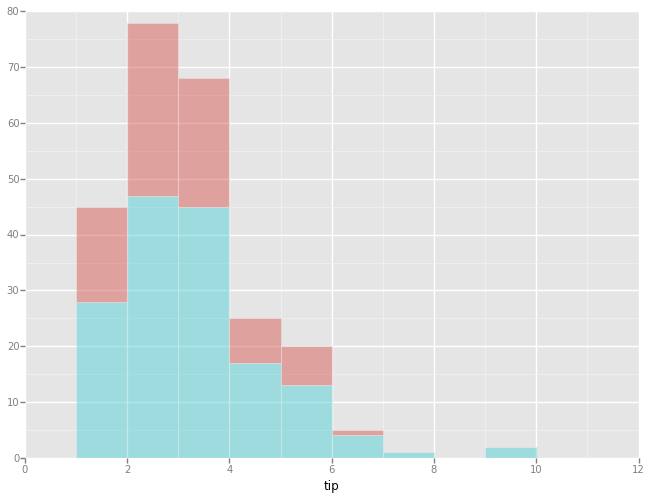

<ggplot: (8743290871285)>

In [69]:
# Overlaid histograms
ggplot(tips, aes(x='tip', fill='sex')) + \
    geom_histogram(binwidth=1, alpha=.5, position="identity")

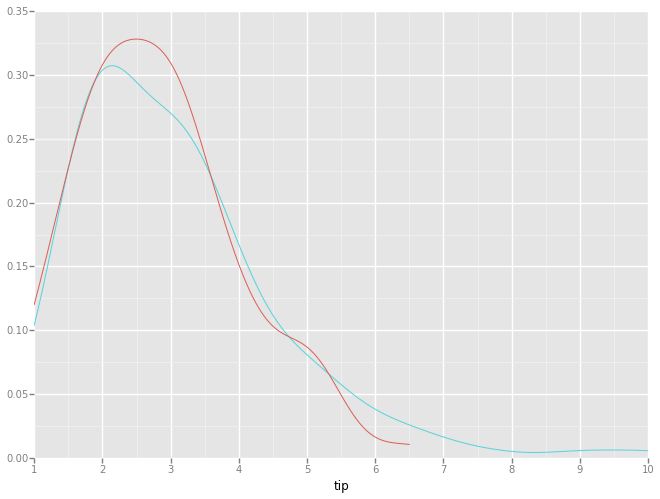

<ggplot: (8742692466561)>

In [412]:
# Density plots
ggplot(tips, aes(x='tip', colour='sex')) + geom_density()

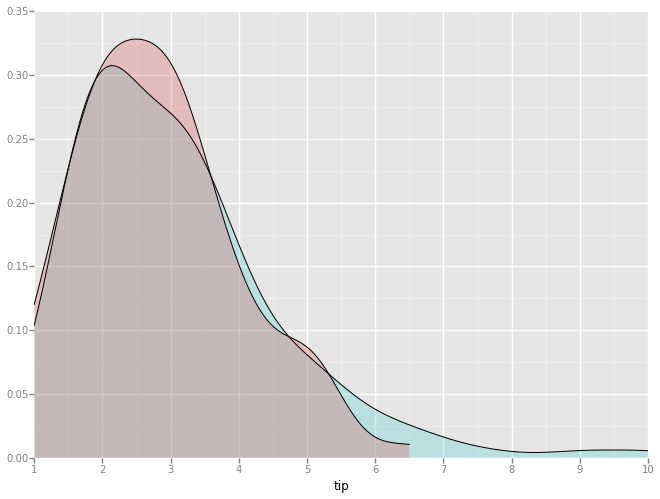

<ggplot: (8742692466549)>

In [414]:
# Density plots with semi-transparent fill
ggplot(tips, aes(x='tip', fill='sex')) + geom_density(alpha=.3)

We said earlier that an essential aspect of data visualization is capturing relationships among many variables: three, four, or even more. This dataset,
simple as it is, illustrates the point. Let us ask, for example, how a third variable such as sex affects the relationship between tip and bill. As sex is
categorical with two levels (i.e., binary), it is natural to divide the data into female and male payers and to generate two scatterplots of tip vs. bill. Let us go even further by including a fourth variable, smoking, which is also binary. We now divide the data into four parts and generate the four scatterplots.

In [422]:
%%R

# The R version of this code - will soon be updated to python code.

install.packages('ggplot2')
library('ggplot2')
tips <- read.csv('../data//tips.csv')

# GET EQUATION AND R-SQUARED AS STRING
# SOURCE: http://goo.gl/K4yhz

plt_cor <- function(subs,x,y) {
  plot_cor <- cor(subs[[x]],subs[[y]])
  return(round(plot_cor,2))
}

p1 <- ggplot(data = subset(tips, (sex == 'M' & smoker == 'No')), aes(x = totbill, y = tip)) +
        geom_point(colour = "black", size = 5) +
        geom_line(colour = "red", size = 1, aes(totbill, totbill*0.18)) +
        geom_text(aes(45, 7 ,label = '18%', vjust = -1)) +
        geom_text(aes(10, 9 ,label = paste('r', plt_cor(subset(tips, (sex == 'M' & smoker == 'No')),'totbill','tip')), vjust = -1)) +
        ggtitle("Male Non-Smokers") +
        xlim(1,50) + ylim(1,10)

p2 <- ggplot(data = subset(tips, (sex == 'M' & smoker == 'Yes')), aes(x = totbill, y = tip)) +
        geom_point(colour = "black", size = 5) +
        geom_line(colour = "red", size = 1, aes(totbill, totbill*0.18)) +
        geom_text(aes(45, 7 ,label = '18%', vjust = -1)) +
        geom_text(aes(10, 9 ,label = paste('r', plt_cor(subset(tips, (sex == 'M' & smoker == 'Yes')),'totbill','tip')), vjust = -1)) +
        ggtitle("Male Smokers") +
        xlim(1,50) + ylim(1,10)


p3 <- ggplot(data = subset(tips, (sex == 'F' & smoker == 'No')), aes(x = totbill, y = tip)) +
        geom_point(colour = "black", size = 5) +
        geom_line(colour = "red", size = 1, aes(totbill, totbill*0.18)) +
        geom_text(aes(45, 7 ,label = '18%', vjust = -1)) +
        geom_text(aes(10, 9 ,label = paste('r', plt_cor(subset(tips, (sex == 'F' & smoker == 'No')),'totbill','tip')), vjust = -1)) +
        ggtitle("Female Non-Smokers") +
        xlim(1,50) + ylim(1,10)


p4 <- ggplot(data = subset(tips, (sex == 'F' & smoker == 'Yes')), aes(x = totbill, y = tip)) +
        geom_point(colour = "black", size = 5) +
        geom_line(colour = "red", size = 1, aes(totbill, totbill*0.18)) +
        geom_text(aes(45, 7 ,label = '18%', vjust = -1)) +
        geom_text(aes(10, 9 ,label = paste('r', plt_cor(subset(tips, (sex == 'F' & smoker == 'Yes')),'totbill','tip')), vjust = -1)) +
        ggtitle("Female Smokers") +
        xlim(1,50) + ylim(1,10)

grid.arrange(p1, p2, p3, p4, ncol = 2, main = "Scatterplots with different sample subsets")

ERROR: Cell magic `%%R` not found.


![](assets/unnamed-chunk-52-1.png)

Inspecting these plots reveals numerous features:

1. For smoking parties, there is a lot less association between the size of the tip and the size of the bill; 
1. When a female non-smoker paid the bill, the tip was a very consistent percentage of the bill, with the exceptions of three dining parties;
1. larger bills were mostly paid by men.

In the above example we gained a wealth of insight in a short time. Using nothing but graphical methods we investigated univariate, bivariate, and multivariate relationships. We found both global features and local detail. We saw that tips were rounded; then we saw the obvious correlation between the tip and the size of the bill, noting the scarcity of generous tippers; finally we discovered differences in the tipping behavior of male and female smokers and non-smokers. In contrast, an old-fashioned approach without graphics would be to fit a regression model. Without subtle regression diagnostics (which rely on graphics!), mmthis approach would miss many of the above insights.

## The Bigger picture

![](assets/images-mod1-big-picture-eda.gif)

To understand data analysis, and how visualization fits in, it is useful to talk about it as a process consisting of several stages:

#### The problem statement

Why do you want to analyze this data? Underlying every dataset is a question or problem statement. For the tipping data the question was provided to us from the data source: “What are the factors that affect tipping behavior?” This problem statement drives the process of any data analysis. Sometimes the problem is identified prior to a data collection. Perhaps it is realized after data becomes available because having the data available has made it possible to imagine new issues

#### Data preparation

During this class, I always hand you a single data matrix with each variable clearly defined. In the real world, it can take a great deal of work to construct a clean data matrix. For example, data values may be missing or misrecorded, data may be distributed across several sources, and the variable definitions and data values may be inconsistent across these sources. It is therefore not uncommon for this stage to consume most of the effort that goes into a project. And it is also not uncommon to loop back to this stage after completing the subsequent stages, to re-prepare and re-analyze the data.

#### Exploratory data analysis

At this stage in the analysis, we make time to “play in the sand” to allow us to find the unexpected, and come to some understanding of our data. It is characterized by direct manipulation and dynamic graphics: plots that respond in real time to an analyst’s queries and change dynamically to re-focus, link to information from other sources, and re-organize information. The analyst can work rapidly and thoroughly through the data, slipping out of dead-ends and chasing down new leads. The high level of interactivity is enabled by bare-bones graphics, which are generally not adequate for presentation purposes.

#### Quantitative analysis

At this stage, we use statistical modeling and statistical interference to answer our primary questions. With statistical models, we summarize complex data, decomposing it into estimates of signal and noise. With statistical inference, we try to assess whether a signal is real. Data visualization plays an important role at this stage, although that is less well known than its key role in exploration. It is helpful both in better understanding a model and in assessing its validity in relation to the data.

For Tips, we have not yet answered the primary question of interest. Let’s fit a regression model using tiprate as the response and the remaining variables (except tip and bill) as the explanatory variables. When we do this, only `size` has a significant regression coefficient. 

`ggplot` support for python is still under development, so for our linear model plots, let's use a tool called seaborn.

In [430]:
!pip install seaborn

Downloading/unpacking seaborn
  Running setup.py (path:/tmp/pip_build_io/seaborn/setup.py) egg_info for package seaborn
    
  Running setup.py install for seaborn
    
Cleaning up...


In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#### Visualizing multiple regression with lmplot()

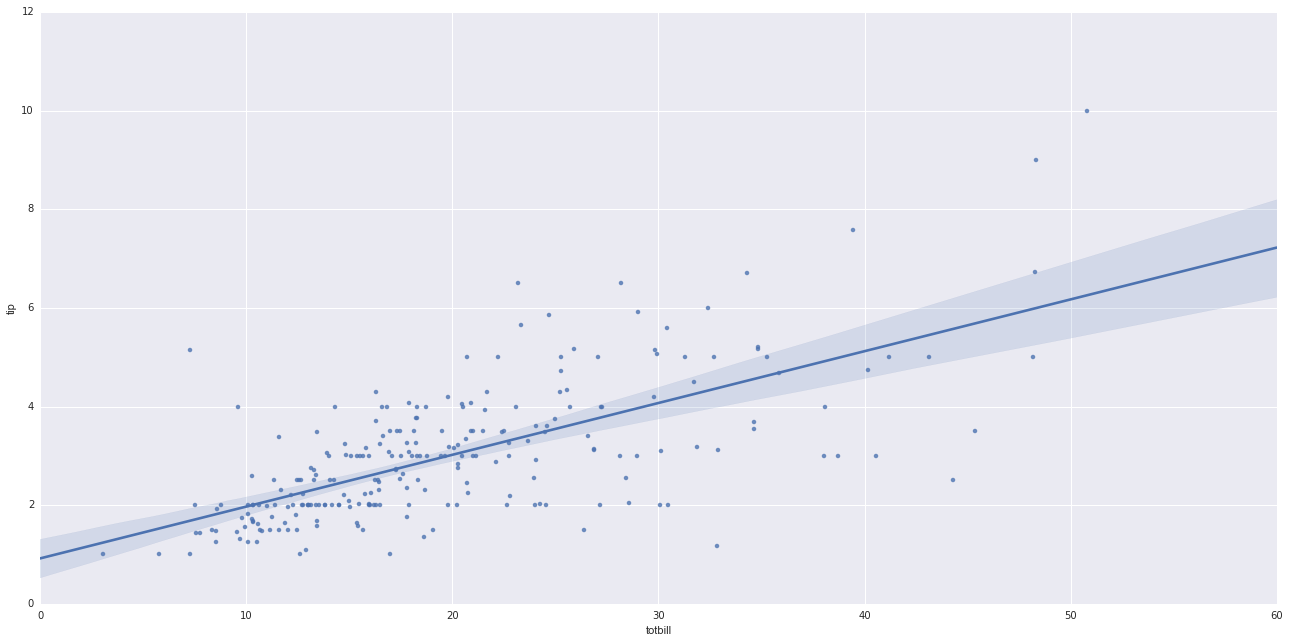

In [73]:
sns.lmplot("totbill", "tip", tips, size=9, aspect=2)

In [482]:
tips

,obs,totbill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,F,No,Sun,Night,2
1,2,10.34,1.66,M,No,Sun,Night,3
2,3,21.01,3.50,M,No,Sun,Night,3
3,4,23.68,3.31,M,No,Sun,Night,2
4,5,24.59,3.61,F,No,Sun,Night,4
5,6,25.29,4.71,M,No,Sun,Night,4
6,7,8.77,2.00,M,No,Sun,Night,2
7,8,26.88,3.12,M,No,Sun,Night,4
8,9,15.04,1.96,M,No,Sun,Night,2
9,10,14.78,3.23,M,No,Sun,Night,2


This plot has two main components. The first is a scatterplot, showing the observed datapoints. The second is a regression line, showing the estimated linear model relating the two variables. Because the regression line is only an estimate, it is plotted with a 95% confidence band to give an impression of the certainty in the model. You can plot different levels of certainty

#### Plotting with discrete predictor variables

Sometimes you will want to plot data where the independent variable is quantitative, but discrete. Although this works fine out of the box:

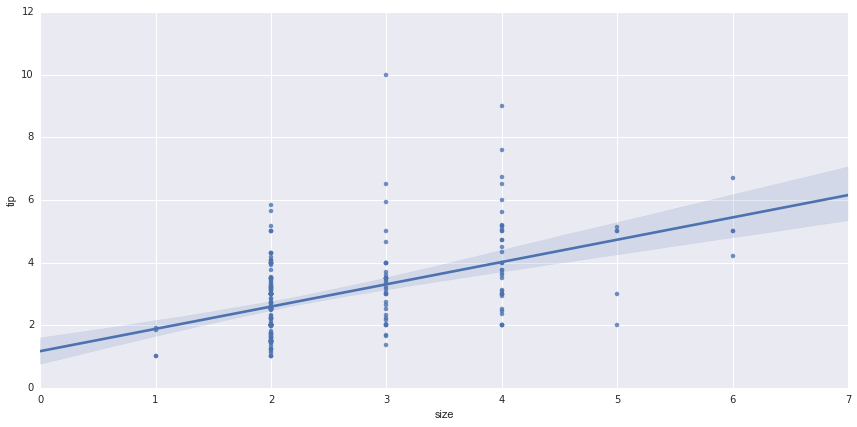

In [450]:
sns.lmplot("size", "tip", tips, size=6, aspect=2)

And can be improved with a bit of jitter:

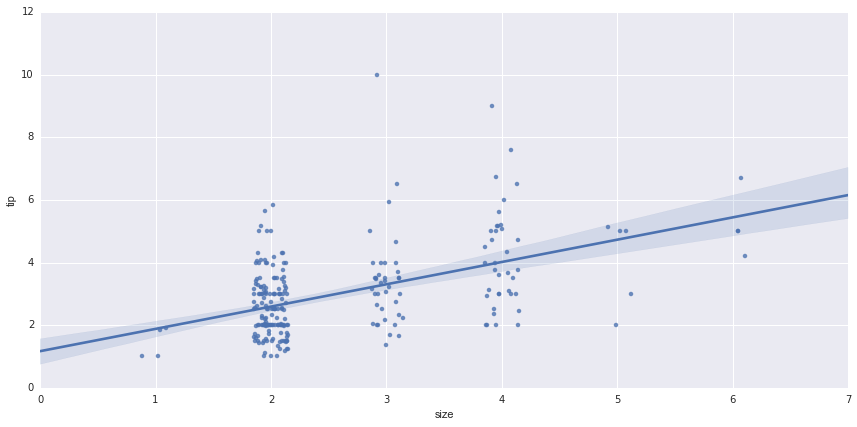

In [452]:
sns.lmplot("size", "tip", tips, size=6, aspect=2, x_jitter=.15);

It might be more informative to estimate the central tendency of each bin. This is easy to do with the x_estimator argument. Just pass any function that aggregates a vector of data into one estimate. The estimator will be bootstrapped and a confidence interval will be plotted – 95% by default, as in other cases within these functions.

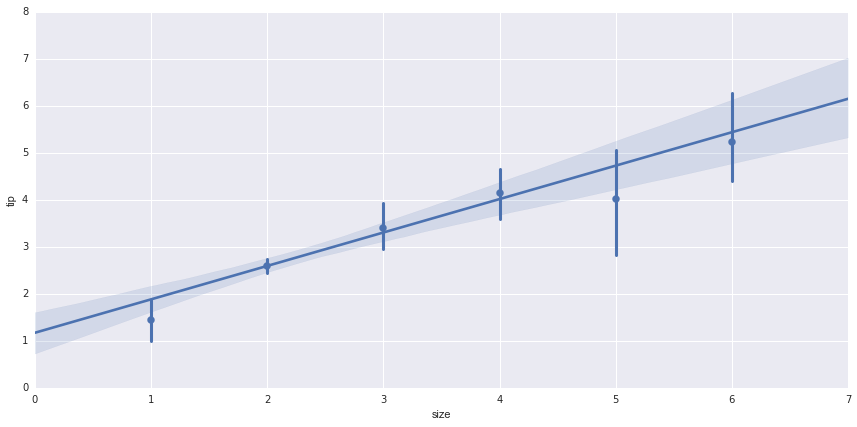

In [454]:
sns.lmplot("size", "tip", tips, x_estimator=np.mean, size=6, aspect=2);

### So what about the model?

Are we satisfied with this model? We have some doubts about it.

In [74]:
tips['tiprate'] = tips.tip / tips.totbill

In [77]:
tips['tiprate']

0     0.059447
1     0.160542
2     0.166587
3     0.139780
4     0.146808
5     0.186240
6     0.228050
7     0.116071
8     0.130319
9     0.218539
10    0.166504
11    0.141804
12    0.101816
13    0.162778
14    0.203641
...
229    0.130199
230    0.083299
231    0.191205
232    0.291990
233    0.136490
234    0.193175
235    0.124131
236    0.079365
237    0.035638
238    0.130338
239    0.203927
240    0.073584
241    0.088222
242    0.098204
243    0.159744
Name: tiprate, Length: 244, dtype: float64

In [78]:
from statsmodels.formula.api import ols

results = ols('tip ~ totbill + size', tips).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sat, 14 Mar 2015   Prob (F-statistic):           9.67e-34
Time:                        12:50:35   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.001         0.288     1.050
totbill        0.0927      0.009     10.172      0.000         0.075     0.111
size           0.1926      0.085      2.258      0.025         0.025     0.361
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                         67.6
==============================================================================
"""

However, in this data it explains only 2% of the variation in tip rate. The points are spread widely around the regression line. There are very few data points for parties of size one, five, and six, which makes us question the validity of the model in these regions. The signal is very weak relative to the noise.

### Presentation

Once an analysis has been completed, the results must be reported, either to clients, managers, or colleagues. The results probably take the form of a narrative and include quantitative summaries such as tables, forecasts, models, and graphics. Quite often, graphics form the bulk of the summaries.

Let's look at some other ways in which data can be sliced and diced in graphs

#### Faceted linear model plots

The lmplot() function is built on top of a FacetGrid. That means it’s easy to visualize how this relationship changes in different subsets of your dataset. You can read the extended documentation for more details on how the FacetGrid class works. The important thing is that you can supply the names of categorical variables that define subsets of the data to plot in different hues or along the row and columns of a grid of axes.

Using a hue facet makes it easiest to directly compare the two subsets:

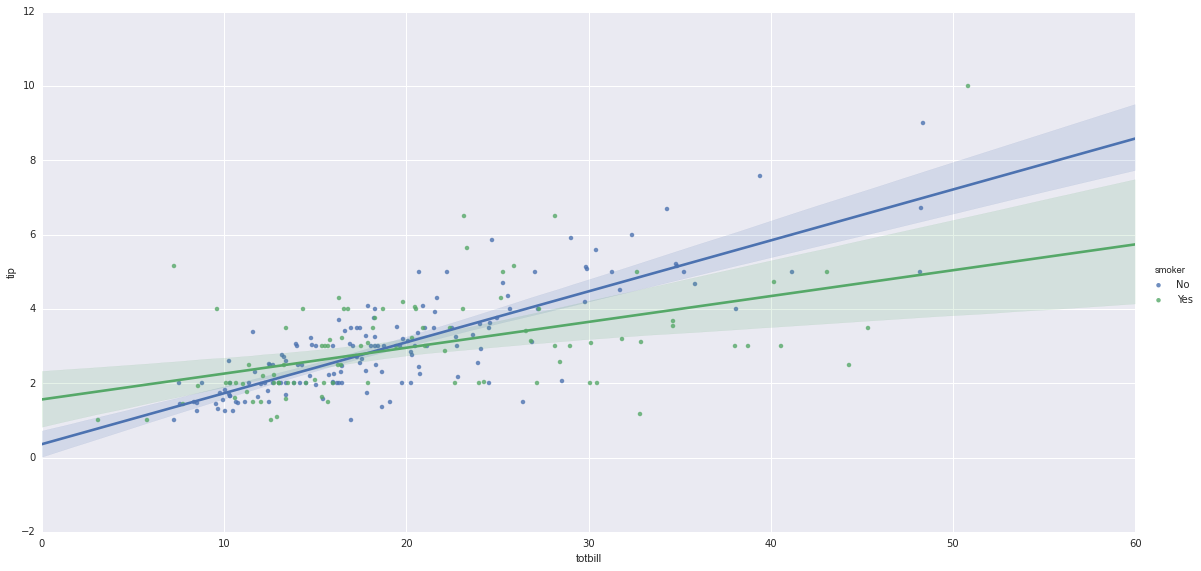

In [465]:
sns.lmplot("totbill", "tip", tips, hue="smoker", size=8, aspect=2);

To make plots that will better reproduce to black-and-white (i.e. when printed), you may want to let the scatterplot marker vary along with the hue variable.

`lmplot()` accepts all arguments that you would use to initialize a FacetGrid, and it returns the grid object after plotting for further tweaking:

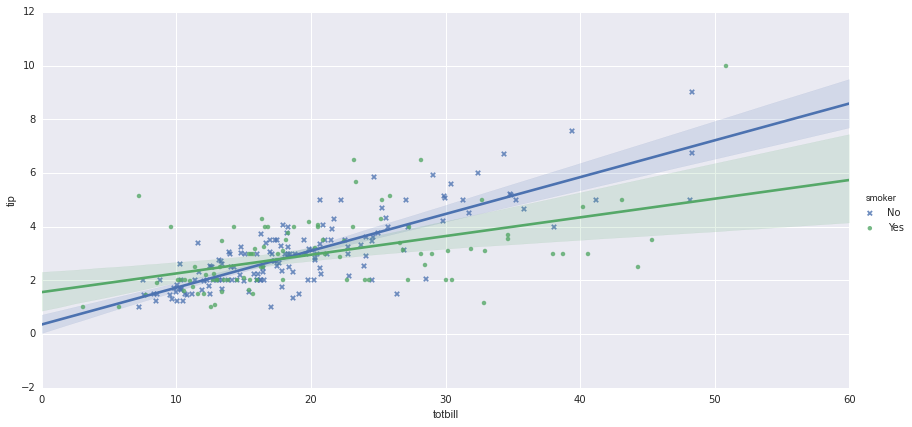

In [83]:
sns.lmplot("totbill", "tip", tips, hue="smoker", markers=["x", "o"], size=6, aspect=2);

Plotting in different columns of a grid also makes a plot that’s easy to understand, although direct comparisons between the subsets are more difficult as the data are separated in space. This might be better when you want the viewer to focus on the relationship within each subset independently.

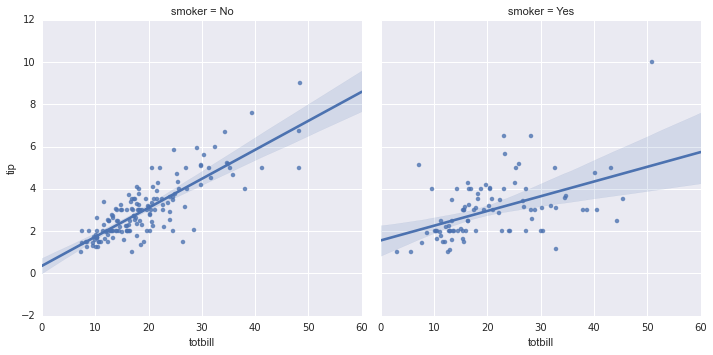

In [84]:
sns.lmplot("totbill", "tip", tips, col="smoker")

`lmplot()` accepts all arguments that you would use to initialize a FacetGrid, and it returns the grid object after plotting for further tweaking:

In [95]:
sun_tips = tips[tips['day'] == 'Sun']

In [ ]:
%matplotlib inline

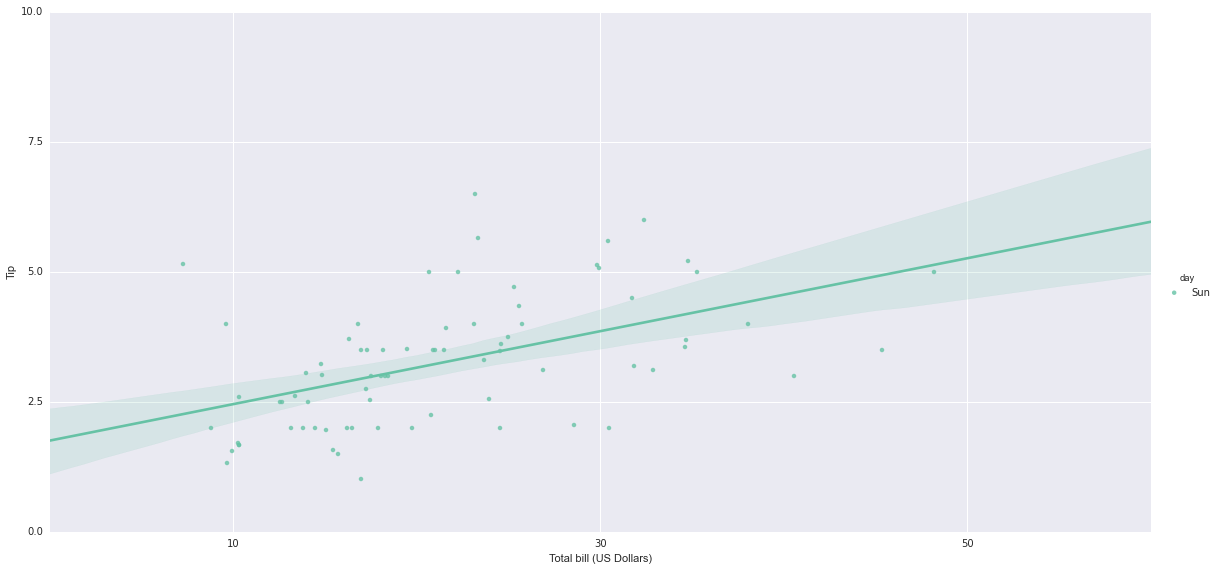

In [96]:
g = sns.lmplot("totbill", "tip", sun_tips, hue="day", palette="Set2",
               hue_order=["Sun"], size=8, aspect=2)

g.set_axis_labels("Total bill (US Dollars)", "Tip");

g.set(xticks=[10, 30, 50], ylim=(0, 10), yticks=[0, 2.5, 5, 7.5, 10]);

## Classwork : New York Air Quality Measurements

Daily air quality measurements in New York, May to September 1973.

Use EDA to get an initial understanding of the dataset.

In [497]:
air = pd.read_csv('../data/airquality.csv')

In [504]:
air

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41,190,7.4,67,5,1
1,2,36,118,8.0,72,5,2
2,3,12,149,12.6,74,5,3
3,4,18,313,11.5,62,5,4
4,5,NaN,NaN,14.3,56,5,5
5,6,28,NaN,14.9,66,5,6
6,7,23,299,8.6,65,5,7
7,8,19,99,13.8,59,5,8
8,9,8,19,20.1,61,5,9
9,10,NaN,194,8.6,69,5,10


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f38ee2ae850>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f38ecd26410>]], dtype=object)

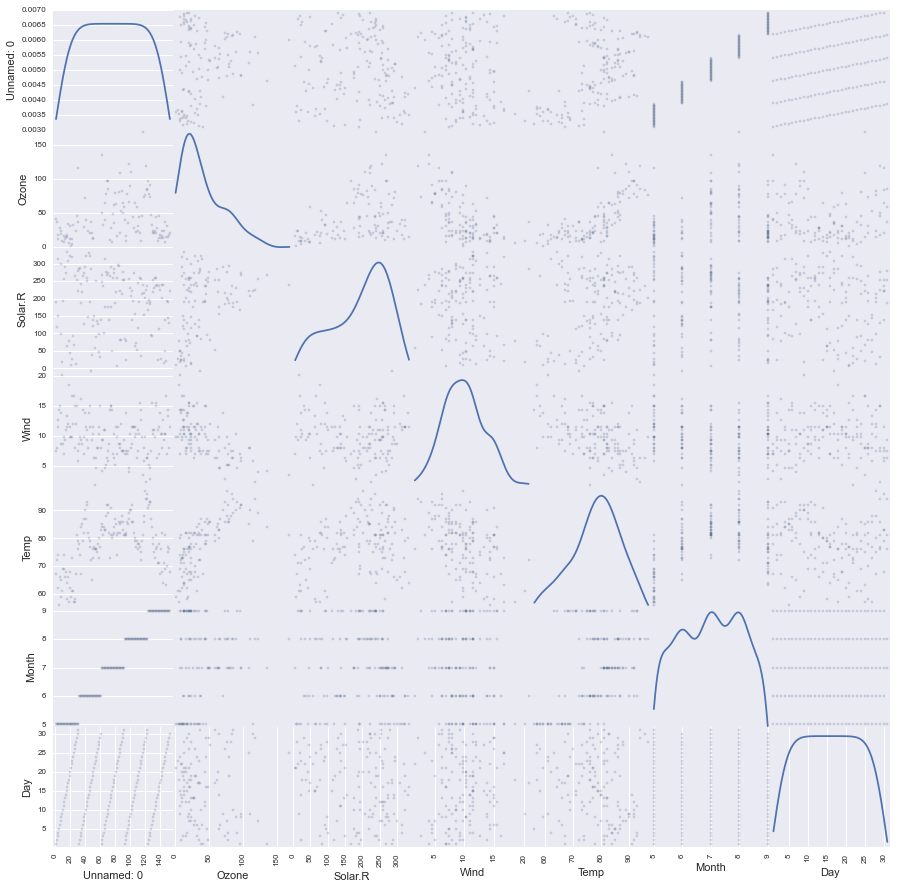

In [503]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(air, alpha=0.2, figsize=(15, 15), diagonal='kde')

1. Count the number of Data points.
1. What does describe() vs. info() tell you about the sample size of “ozone”?
1. Calculating the Summary Statistics
1. What’s Panda’s default way of dealing with missing values for its numpy functions like mean, cumsum and std?
1. How could you deal with the missing values in the ozone dataset?
1. Which visual ways would be suitable to explore this dataset? Use them.
1. Explore the relationships in the dataset.

If you finish early - show me your work and see if you can find out whether you can use EDA on the ‘olives.csv’ dataset to prove the authenticity of olive oil… based on its fatty acid contents!